In [2]:
# Cell 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import os
from datetime import datetime
import wfdb

# Create output directory
output_dir = "analysis_results"
os.makedirs(output_dir, exist_ok=True)

In [4]:
# Cell 2: Load Dataset
current_dir = os.getcwd()  # Current directory
dataset_folder = "dataset/"  # Folder containing dataset files
path = os.path.join(current_dir, dataset_folder)
# Check if the dataset file exists
try:
    df = pd.read_csv(path + 'ptbxl_database.csv', index_col='ecg_id')
    df.scp_codes = df.scp_codes.apply(ast.literal_eval)
    df = df[df.age <= 89]  # Filter age
except FileNotFoundError:
    print("Dataset file not found. Please download the dataset, extract it, and name the folder as 'dataset'.")
    


Dataset file not found. Please download the dataset, extract it, and name the folder as 'dataset'.


In [4]:
# Cell 3: Dataset Summary
summary = {
    'Total Records': len(df),
    'Unique Patients': df.patient_id.nunique(),
    'Age Range': f"{df.age.min():.0f}-{df.age.max():.0f}",
    'Gender Distribution': {
        'Male': len(df[df.sex == 1]),
        'Female': len(df[df.sex == 0]),
    },
    'Recording Duration': '10 seconds',
    'Sampling Rate': '500 Hz (original), 100 Hz (downsampled)',
    'Number of Leads': 12,
    'Data Size': f"{df.memory_usage().sum() / 1024**2:.2f} MB",
    'Missing Values': df.isnull().sum().sum(),
    'Student': 'Barış Can Ataklı - 210717014'
}

for key, value in summary.items():
    print(f"{key}: {value}")


Total Records: 21506
Unique Patients: 18612
Age Range: 2-89
Gender Distribution: {'Male': 10220, 'Female': 11286}
Recording Duration: 10 seconds
Sampling Rate: 500 Hz (original), 100 Hz (downsampled)
Number of Leads: 12
Data Size: 4.16 MB
Missing Values: 204954
Student: Barış Can Ataklı - 210717014


C:\Users\baris\AppData\Local\Temp\ipykernel_2892\1681853352.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sex', y='age', palette=['lightcoral', 'lightblue'])


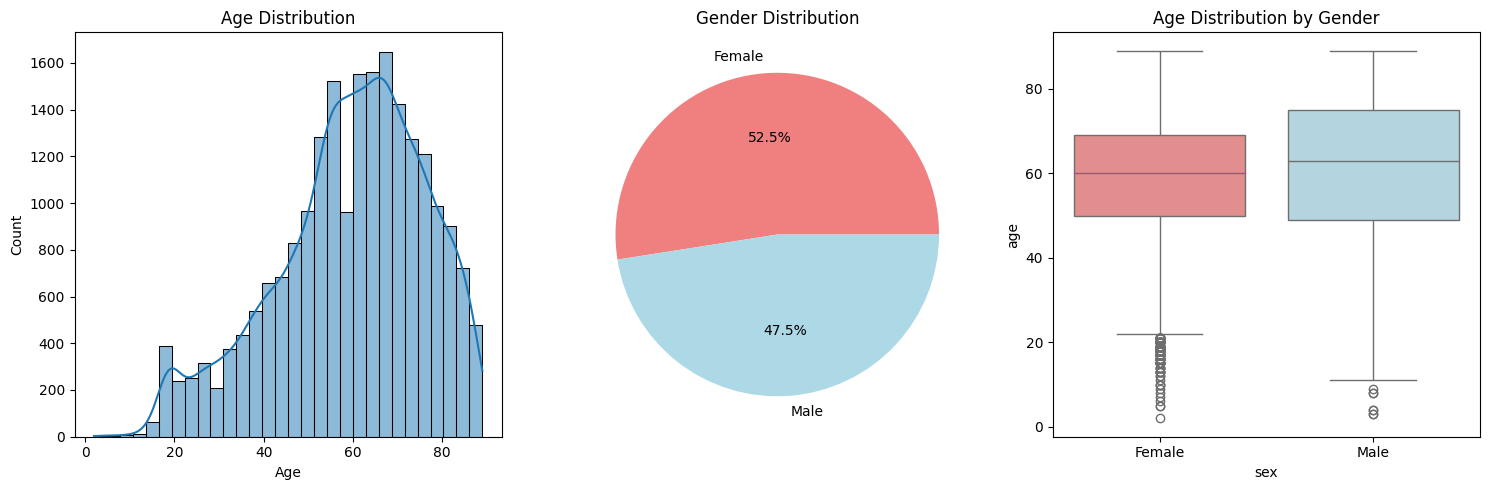

In [5]:
# Cell 2: Enhanced Demographics Analysis
plt.figure(figsize=(15, 5))

# Age Distribution with KDE
plt.subplot(131)
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Gender Distribution with percentages
plt.subplot(132)
gender_counts = df.sex.value_counts()
plt.pie(gender_counts, labels=['Female', 'Male'], 
        autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Gender Distribution')

# Age Distribution by Gender with Box Plot
plt.subplot(133)
sns.boxplot(data=df, x='sex', y='age', palette=['lightcoral', 'lightblue'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Age Distribution by Gender')

plt.tight_layout()
plt.savefig(f'{output_dir}/demographics_enhanced.png', dpi=300, bbox_inches='tight')

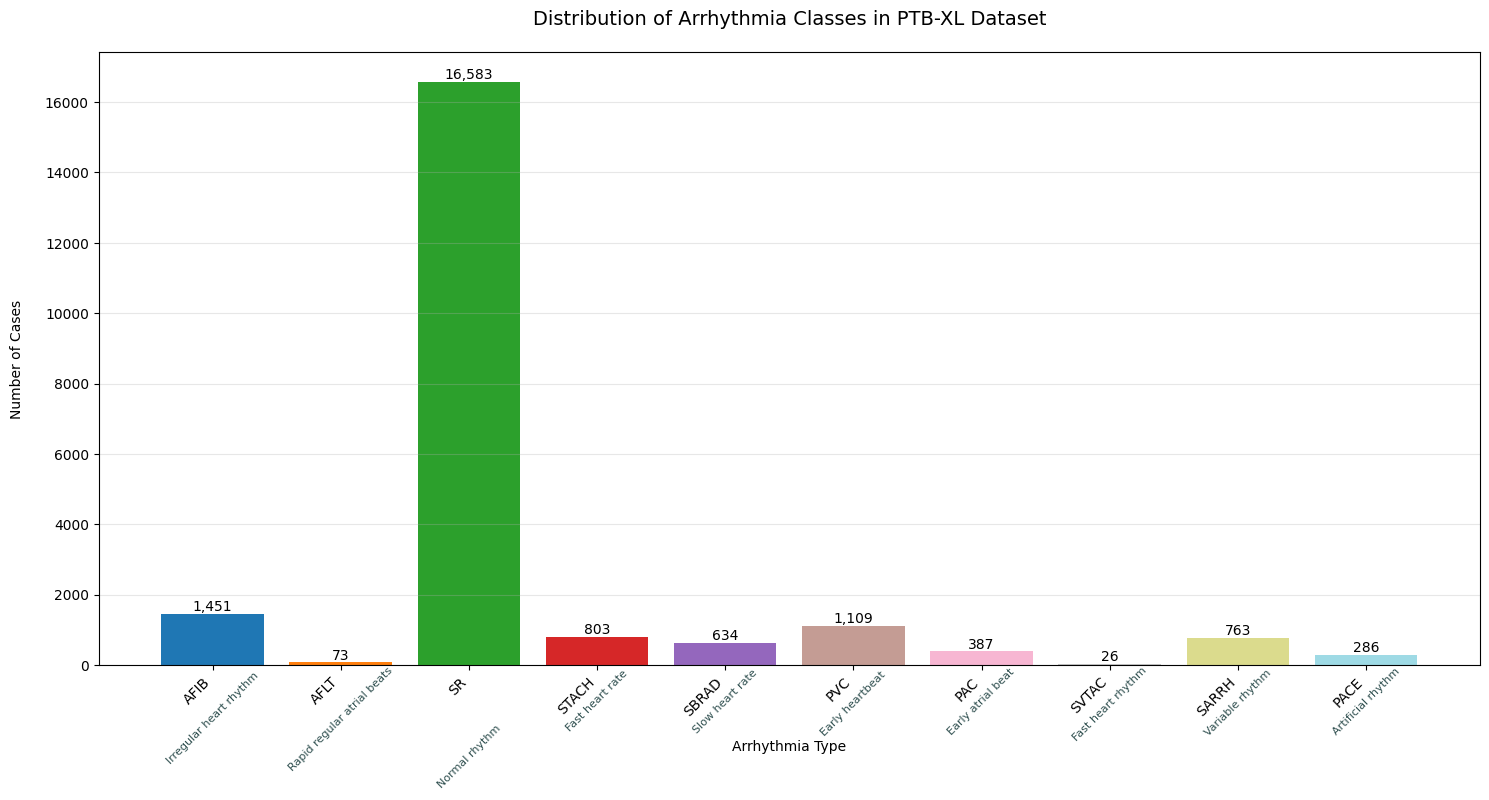

In [6]:
# Cell 3: Enhanced Arrhythmia Analysis
# Define arrhythmia classes
ARRHYTHMIA_CLASSES = [
    'AFIB',  # Atrial Fibrillation
    'AFLT',  # Atrial Flutter
    'SR',    # Sinus Rhythm
    'STACH', # Sinus Tachycardia
    'SBRAD', # Sinus Bradycardia
    'PVC',   # Premature Ventricular Complex
    'PAC',   # Premature Atrial Complex
    'SVTAC', # Supraventricular Tachycardia
    'SARRH', # Sinus Arrhythmia
    'PACE'   # Pacemaker
]

# Include all classes from ARRHYTHMIA_CLASSES
arrhythmia_descriptions = {
    'AFIB': 'Atrial Fibrillation\n(Irregular heart rhythm)',
    'AFLT': 'Atrial Flutter\n(Rapid regular atrial beats)',
    'SR': 'Sinus Rhythm\n(Normal rhythm)',
    'STACH': 'Sinus Tachycardia\n(Fast heart rate)',
    'SBRAD': 'Sinus Bradycardia\n(Slow heart rate)',
    'PVC': 'Premature Ventricular Complex\n(Early heartbeat)',
    'PAC': 'Premature Atrial Complex\n(Early atrial beat)',
    'SVTAC': 'Supraventricular Tachycardia\n(Fast heart rhythm)',
    'SARRH': 'Sinus Arrhythmia\n(Variable rhythm)',
    'PACE': 'Pacemaker\n(Artificial rhythm)'
}

# Count instances
class_counts = {cls: len(df[df.scp_codes.apply(lambda x: cls in x)]) for cls in ARRHYTHMIA_CLASSES}

# Cell 3: Enhanced Arrhythmia Visualization
plt.figure(figsize=(15, 8))

# Create color palette
colors = plt.cm.tab20(np.linspace(0, 1, len(ARRHYTHMIA_CLASSES)))

# Create bar plot
bars = plt.bar(class_counts.keys(), class_counts.values(), color=colors)
plt.title('Distribution of Arrhythmia Classes in PTB-XL Dataset', pad=20, size=14)
plt.xlabel('Arrhythmia Type', labelpad=15)
plt.ylabel('Number of Cases', labelpad=15)

# Add value labels and descriptions
for bar, cls in zip(bars, ARRHYTHMIA_CLASSES):
    height = bar.get_height()
    description = arrhythmia_descriptions[cls].split('\n')[1].strip('()')
    
    # Add count on top of bar
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')
    
    # Add description below label
    plt.text(bar.get_x() + bar.get_width()/2., -height*0.1,
             description,
             ha='center', va='top',
             rotation=45,
             fontsize=8,
             color='darkslategray')

# Adjust layout
plt.xticks(range(len(ARRHYTHMIA_CLASSES)), ARRHYTHMIA_CLASSES, rotation=45, ha='right')
plt.grid(True, axis='y', alpha=0.3)

# Add padding at bottom for descriptions
plt.subplots_adjust(bottom=0.25)

plt.tight_layout()
plt.savefig(f'{output_dir}/arrhythmia_distribution.png', 
            dpi=300, bbox_inches='tight')
plt.show()

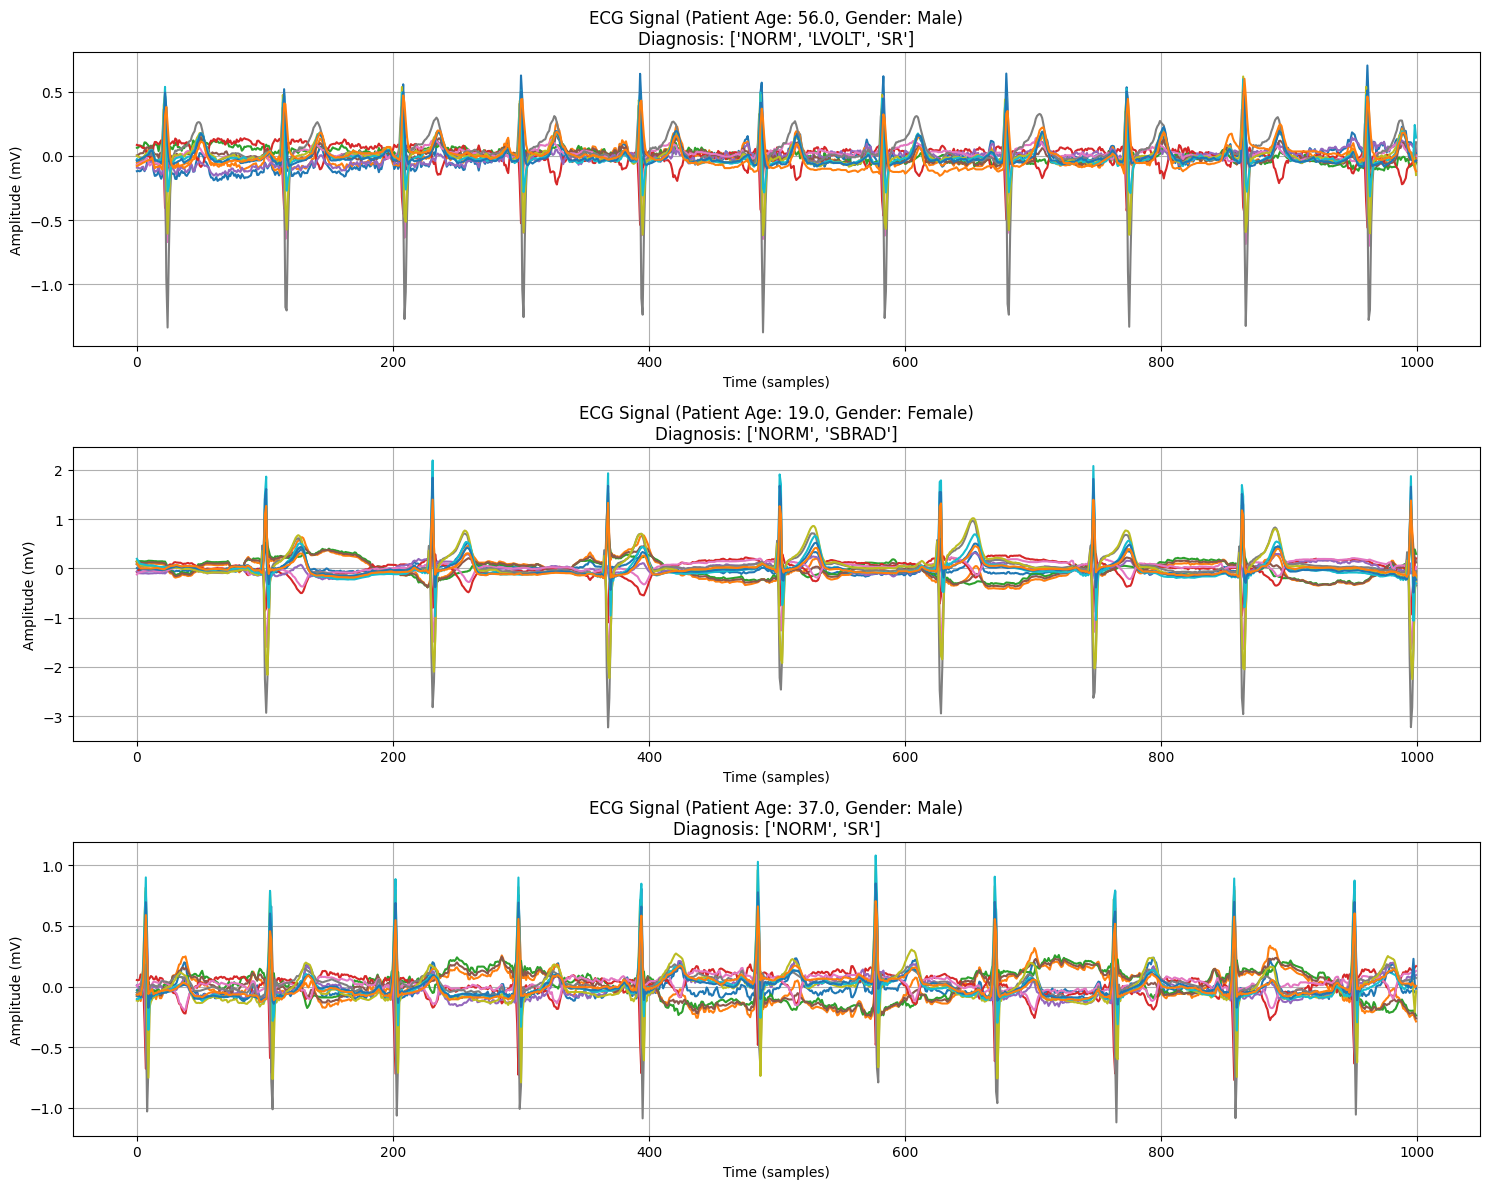


Patient 1:
Age: 56.0
Gender: Male
Diagnoses: ['NORM', 'LVOLT', 'SR']

Patient 2:
Age: 19.0
Gender: Female
Diagnoses: ['NORM', 'SBRAD']

Patient 3:
Age: 37.0
Gender: Male
Diagnoses: ['NORM', 'SR']


In [7]:
# Cell 6: Visualize Example ECG Signal from Dataset
def load_example_signal(df, path, index=0):
    """
    Loads a real ECG signal from the PTB-XL dataset
    
    Args:
        df: DataFrame containing metadata
        path: Path to dataset
        index: Which record to load (default=0 means first record)
    """
    record = df.iloc[index]  # Get specific patient record
    signal, meta = wfdb.rdsamp(path + record.filename_lr)  # Load actual ECG signal data
    return signal, meta

# Let's show multiple examples with diagnosis
plt.figure(figsize=(15, 12))

# Plot 3 different patient signals
for i in range(3):
    record = df.iloc[i]
    signal, meta = load_example_signal(df, path, index=i)
    
    plt.subplot(3, 1, i+1)
    plt.plot(signal)
    plt.title(f'ECG Signal (Patient Age: {record.age}, Gender: {"Male" if record.sex==1 else "Female"})\n' + 
              f'Diagnosis: {list(record.scp_codes.keys())}')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude (mV)')
    plt.grid(True)

plt.tight_layout()
plt.savefig(f'{output_dir}/real_patient_signals.png', dpi=300, bbox_inches='tight')
plt.show()

# Print diagnostic details
for i in range(3):
    record = df.iloc[i]
    print(f"\nPatient {i+1}:")
    print(f"Age: {record.age}")
    print(f"Gender: {'Male' if record.sex==1 else 'Female'}")
    print(f"Diagnoses: {list(record.scp_codes.keys())}")